In [1]:
using Revise
include("VCAS_Reachability.jl")

saveReachability (generic function with 4 methods)

In [120]:
# Takes a little while to run, but only needs to be run once for a given delta value, assuming
# speed is constant
delta2 = 0.0
for delta1 in [8.0,9.0]
    writeReachDynamicsMmap(ver=1,delta1=delta1,delta2=delta2)
end
#=
delta2 = 0.5
for delta1 in [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0]
    writeReachDynamicsMmap(ver=1,delta1=delta1,delta2=delta2)
end

delta2 = 1.0
for delta1 in [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0]
    writeReachDynamicsMmap(ver=1,delta1=delta1,delta2=delta2)
end

delta2 = 1.5
for delta1 in [0.0,1.0]
    writeReachDynamicsMmap(ver=1,delta1=delta1,delta2=delta2)
end

delta2 = 2.0
for delta1 in [0.0,1.0]
    writeReachDynamicsMmap(ver=1,delta1=delta1,delta2=delta2)
end
=#

Writing reachable state dynamics to memory-mapped file
delta1 = 8.000, delta2 = 0.000
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500
Writing reachable state dynamics to memory-mapped file
delta1 = 9.000, delta2 = 0.000
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500


In [1123]:
# There are two methods to approximate the neural network policy:

# This method evaluates a point within each cell to determine one action given within each cell
# This is not an over-approximation, but is faster than ReluVal and useful for debugging
#writeNetworkActionsMmap(folder="/raid/kjulian3/VertCAS/Reach/NetworkApprox",nnetFolder="networks",ver=5,ver2=4,hu=25,epochs=1000,useReluVal=false);

# This method reads in the output of running the runReluVal.sh script, which runs ReluVal to compute all advisories given
# within each cell.
# This is an over-approximation of the neural network policy and can be run after running the runReluVal.sh script.
writeNetworkActionsMmap(folder="/raid/kjulian3/VertCAS/Reach/NetworkApprox",reluvalFolder="../ReluVal_intrSpeed",ver=5,ver2=4,hu=25,epochs=1000,useReluVal=true);


pRA: COC
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500

pRA: DNC
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500

pRA: DND
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500

pRA: DES1500
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500

pRA: CL1500
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500

pRA: SDES1500
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500

pRA: SCL1500
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500

pRA: SDES2500
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500

pRA: SCL2500
RA: COC
RA: DNC
RA: DND
RA: DES1500
RA: CL1500
RA: SDES1500
RA: SCL1500
RA: SDES2500
RA: SCL2500
855.805041 s

## Run Reachability

In [2]:
function loadReachSets(delta1,delta2,pd,useTable=false)
    folder = "/raid/kjulian3/VertCAS/Reach/JGCD_Sets"
    token = "Reluval"
    if useTable
        token = "Table"
    end
    filename = @sprintf("%s/Sets_%s_pd%d_delta1%.3f_delta2%.3f.h5",folder,token,pd,delta1,delta2)
    return loadSets(filename)
end

loadReachSets (generic function with 2 methods)

In [53]:
function saveReachability(delta1,delta2,pd)
    folder = "/raid/kjulian3/VertCAS/Reach/JGCD_Sets"
    token = "reluVal"
    filename = @sprintf("Sets_Reluval_pd%d_delta1%.3f_delta2%.3f.h5",pd,delta1,delta2)
    println(filename)
    sets = runReachability(delta1,delta2,pd,token=token,stopAtNMAC=true,useTable=false);
    saveSets(folder*"/"*filename, sets)
    
    filename = @sprintf("Sets_Table_pd%d_delta1%.3f_delta2%.3f.h5",pd,delta1,delta2)
    println(filename)
    sets = runReachability(delta1,delta2,pd,token=token,stopAtNMAC=true,useTable=true);
    saveSets(folder*"/"*filename, sets);
end

saveReachability (generic function with 1 method)

In [122]:
delta2 = 0.0
for delta1 in [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
    saveReachability(delta1,delta2,0)
end

delta2 = 0.5
for delta1 in [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0]
    saveReachability(delta1,delta2,0)
end

delta2 = 1.0
for delta1 in [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0]
    saveReachability(delta1,delta2,0)
end

delta2 = 1.5
for delta1 in [0.0,1.0]
    saveReachability(delta1,delta2,0)
end

delta2 = 2.0
for delta1 in [0.0,1.0]
    saveReachability(delta1,delta2,0)
end

delta2 = 2.5
for delta1 in [0.0,1.0]
    saveReachability(delta1,delta2,0)
end

delta2 = 3.0
for delta1 in [0.0,1.0]
    saveReachability(delta1,delta2,0)
end

Sets_Reluval_pd0_delta10.000_delta20.000.h5
  1.984896 seconds (34.45 M allocations: 968.262 MiB, 18.53% gc time)
  3.621428 seconds (35.50 M allocations: 1019.138 MiB, 7.74% gc time)
  4.290557 seconds (37.37 M allocations: 1.081 GiB, 4.61% gc time)
  5.477932 seconds (35.60 M allocations: 1.049 GiB, 5.25% gc time)
  5.421708 seconds (32.64 M allocations: 996.821 MiB, 3.18% gc time)
  5.423308 seconds (29.87 M allocations: 918.713 MiB, 2.95% gc time)
  5.493613 seconds (27.29 M allocations: 846.632 MiB, 4.41% gc time)
  5.644266 seconds (25.22 M allocations: 789.103 MiB, 2.55% gc time)
  5.232924 seconds (23.68 M allocations: 746.031 MiB, 4.29% gc time)
  4.789554 seconds (22.17 M allocations: 698.068 MiB, 2.52% gc time)

t = 30
  4.775557 seconds (20.76 M allocations: 658.263 MiB, 2.36% gc time)
  4.517312 seconds (19.45 M allocations: 615.846 MiB, 4.44% gc time)
  4.403211 seconds (18.12 M allocations: 578.953 MiB, 2.27% gc time)
  4.350242 seconds (16.84 M allocations: 543.329 MiB,

  3.433455 seconds (4.97 M allocations: 203.934 MiB, 0.99% gc time)
Number of different cells: 4344
  3.427590 seconds (5.01 M allocations: 204.922 MiB, 0.90% gc time)
Number of different cells: 2855
  3.429631 seconds (5.03 M allocations: 205.477 MiB, 0.98% gc time)
Number of different cells: 1955
  3.428274 seconds (5.04 M allocations: 205.905 MiB, 0.99% gc time)
Number of different cells: 1615
  3.413135 seconds (5.06 M allocations: 206.282 MiB, 0.91% gc time)
Number of different cells: 1375
  3.421149 seconds (5.07 M allocations: 206.587 MiB, 0.90% gc time)

t = -10
Number of different cells: 1219
  3.532631 seconds (5.08 M allocations: 206.856 MiB, 3.69% gc time)
Number of different cells: 1076
  3.423531 seconds (5.09 M allocations: 207.088 MiB, 0.99% gc time)
Number of different cells: 839
  3.438669 seconds (5.09 M allocations: 207.253 MiB, 0.90% gc time)
Number of different cells: 561
  3.431179 seconds (5.10 M allocations: 207.343 MiB, 0.90% gc time)
Number of different cells

Number of different cells: 137
  3.172266 seconds (5.18 M allocations: 210.166 MiB, 1.19% gc time)
Number of different cells: 94
  3.151310 seconds (5.18 M allocations: 210.142 MiB, 1.20% gc time)

t = -10
Number of different cells: 53
  3.160074 seconds (5.18 M allocations: 210.127 MiB, 1.20% gc time)
Number of different cells: 41
  3.150763 seconds (5.18 M allocations: 210.112 MiB, 1.20% gc time)
Number of different cells: 36
  3.268855 seconds (5.18 M allocations: 210.100 MiB, 3.98% gc time)
Number of different cells: 30
  3.161985 seconds (5.18 M allocations: 210.090 MiB, 1.11% gc time)
Number of different cells: 22
  3.153132 seconds (5.17 M allocations: 210.082 MiB, 1.20% gc time)
Number of different cells: 18
  3.157276 seconds (5.17 M allocations: 210.076 MiB, 1.19% gc time)
Number of different cells: 13
  3.162601 seconds (5.17 M allocations: 210.071 MiB, 1.20% gc time)
Number of different cells: 10
  3.169347 seconds (5.17 M allocations: 210.068 MiB, 1.20% gc time)
Number of 

  3.526090 seconds (8.42 M allocations: 315.117 MiB, 1.45% gc time)
  3.520238 seconds (7.73 M allocations: 294.919 MiB, 1.43% gc time)
  3.508023 seconds (7.13 M allocations: 277.537 MiB, 1.24% gc time)
  3.485936 seconds (6.59 M allocations: 261.729 MiB, 1.22% gc time)
  3.564984 seconds (6.09 M allocations: 247.492 MiB, 3.83% gc time)
  3.459402 seconds (5.68 M allocations: 235.958 MiB, 1.09% gc time)
  3.454929 seconds (5.40 M allocations: 227.945 MiB, 1.08% gc time)
  3.450771 seconds (5.17 M allocations: 221.473 MiB, 0.99% gc time)
  3.445739 seconds (5.02 M allocations: 217.471 MiB, 0.98% gc time)
  3.444586 seconds (4.99 M allocations: 216.794 MiB, 0.90% gc time)

t = 0
  3.449713 seconds (5.06 M allocations: 219.332 MiB, 0.98% gc time)
Number of different cells: 19982
  3.453900 seconds (5.25 M allocations: 224.569 MiB, 0.99% gc time)
Number of different cells: 13558
  3.252118 seconds (5.40 M allocations: 223.257 MiB, 4.15% gc time)
Number of different cells: 8198
  3.160729 

InterruptException: InterruptException:

In [59]:
delta2 = 2.0
for delta1 in [0.0]
    saveReachability(delta1,delta2,0)
end

Sets_Reluval_pd0_delta10.000_delta22.000.h5
  1.667033 seconds (34.45 M allocations: 1.186 GiB, 16.25% gc time)
  2.732752 seconds (39.08 M allocations: 1.396 GiB, 7.56% gc time)
  5.193284 seconds (46.70 M allocations: 1.717 GiB, 6.58% gc time)
  5.875890 seconds (50.07 M allocations: 1.860 GiB, 6.13% gc time)
  6.171607 seconds (52.64 M allocations: 1.971 GiB, 4.53% gc time)
  6.336824 seconds (54.39 M allocations: 2.039 GiB, 6.07% gc time)
  6.330530 seconds (54.44 M allocations: 2.041 GiB, 6.11% gc time)
  6.202691 seconds (53.84 M allocations: 2.018 GiB, 4.62% gc time)
  6.272193 seconds (53.02 M allocations: 1.986 GiB, 5.95% gc time)
  5.928449 seconds (51.87 M allocations: 1.937 GiB, 6.26% gc time)

t = 30
  5.784956 seconds (50.42 M allocations: 1.882 GiB, 4.60% gc time)
  5.838621 seconds (48.80 M allocations: 1.819 GiB, 6.05% gc time)
  5.786420 seconds (47.13 M allocations: 1.755 GiB, 6.03% gc time)
  5.622194 seconds (45.40 M allocations: 1.687 GiB, 4.25% gc time)
  5.63907

  5.163612 seconds (30.72 M allocations: 1.158 GiB, 3.38% gc time)
  5.117976 seconds (29.93 M allocations: 1.126 GiB, 3.26% gc time)
  5.191352 seconds (28.53 M allocations: 1.073 GiB, 5.01% gc time)
  5.038190 seconds (27.08 M allocations: 1.021 GiB, 2.97% gc time)
  5.108169 seconds (25.83 M allocations: 996.559 MiB, 4.79% gc time)
  4.950851 seconds (24.00 M allocations: 926.167 MiB, 2.68% gc time)

t = 10
  4.890652 seconds (22.03 M allocations: 851.222 MiB, 2.55% gc time)
  4.811807 seconds (20.07 M allocations: 775.516 MiB, 2.34% gc time)
  4.877549 seconds (18.10 M allocations: 699.197 MiB, 4.10% gc time)
  4.702388 seconds (15.88 M allocations: 616.003 MiB, 1.91% gc time)
  4.916340 seconds (13.41 M allocations: 530.784 MiB, 1.65% gc time)
  4.855080 seconds (10.85 M allocations: 439.447 MiB, 1.35% gc time)
  4.773589 seconds (8.78 M allocations: 368.134 MiB, 1.09% gc time)
  4.752152 seconds (7.34 M allocations: 320.193 MiB, 1.02% gc time)
  4.525674 seconds (6.64 M allocatio

In [63]:
allSets_Reluval = Dict()
allSets_Table = Dict()

Dict{Any,Any} with 0 entries

In [ ]:
# Key Parameters
delta1 = 3.0   # How much the turn rate bounds on ownship and intruder are relaxed
delta2 = 1.5   # How much the turn rate bounds on ownship and intruder are relaxed
pd = 0        # Pilot delay
if !(delta1 in keys(allSets_Reluval))
    allSets_Reluval[delta1] = Dict()
end
if !(delta2 in keys(allSets_Reluval[delta1]))
    allSets_Reluval[delta1][delta2] = Dict()
end
token = "reluVal"
#minTime = -100
#initPoint = [0,0,0]
allSets_Reluval[delta1][delta2][pd] = runReachability(delta1,delta2,pd,token=token,stopAtNMAC=true,useTable=false);

 23.688172 seconds (34.21 M allocations: 3.102 GiB, 3.60% gc time)
 26.874196 seconds (42.31 M allocations: 3.868 GiB, 3.26% gc time)
 15.515737 seconds (61.83 M allocations: 5.592 GiB, 7.35% gc time)
 12.827602 seconds (66.24 M allocations: 6.011 GiB, 8.86% gc time)
 10.850952 seconds (68.27 M allocations: 6.204 GiB, 10.75% gc time)
  9.932297 seconds (68.45 M allocations: 6.203 GiB, 11.60% gc time)
  9.561427 seconds (66.88 M allocations: 6.010 GiB, 11.62% gc time)
  9.284582 seconds (64.86 M allocations: 5.766 GiB, 10.46% gc time)
  9.665639 seconds (62.95 M allocations: 5.545 GiB, 13.13% gc time)
  9.091552 seconds (61.41 M allocations: 5.359 GiB, 13.55% gc time)

t = 30
  8.835970 seconds (60.07 M allocations: 5.187 GiB, 12.22% gc time)
  8.387916 seconds (58.71 M allocations: 4.999 GiB, 11.59% gc time)


In [65]:
pd=0
for (delta1, set) in allSets_Reluval
    for (delta2, set2) in set
        for (pd, set3) in set2
            filename = @sprintf("Sets_Reluval_pd%d_delta1%.3f_delta2%.3f.h5",pd,delta1,delta2)
            println(filename)
            saveSets(filename, set3)
        end
    end
end

Sets_Reluval_pd0_delta14.000_delta20.000.h5


In [2]:
delta1 = 0.0
delta2 = 0.0
pd = 0
useTable = false
sets = loadReachSets(delta1, delta2, pd,useTable);

## Prototype colors

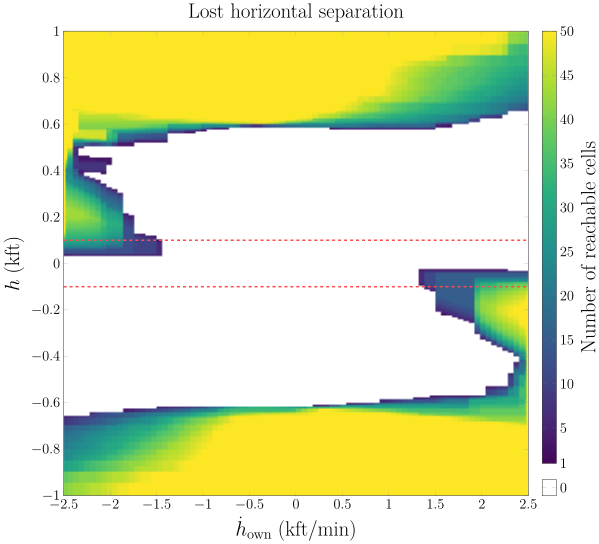

In [12]:
# Plot the reachable set
xmin = -2.5; xmax = 2.5; ymin = -1; ymax = 1;
t = 0
plotReachable(sets,[xmin,xmax,ymin,ymax],t,nbin=250,isLast=false)

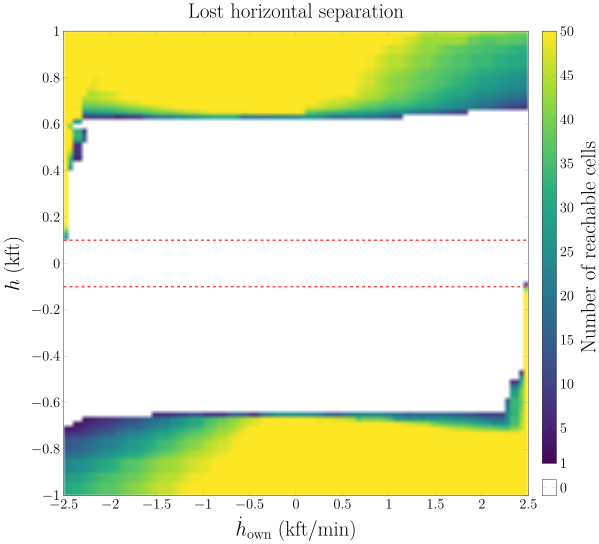

In [111]:
# Plot the reachable set
xmin = -2.5; xmax = 2.5; ymin = -1; ymax = 1;
t = 0
plotReachable(sets,[xmin,xmax,ymin,ymax],t,nbin=100,isLast=false)